# Geoffrey Gund - Governance Analytics Project

# Step 1: get the data

In [1]:
#%% specifying data location data from gitHub, preparing data
import os
import xlrd
folderData="https://rawgit.com/geeoffgoond/project/master/"
fileXL=os.path.join(folderData,"2015-pr1-hhsurvey-household.xlsx")

# importing data into pandas
import pandas as pd

psrchh=pd.read_excel(fileXL)

# Step 2: lets look at the data and limit it to what we need

In [2]:
#checking what columns we have
psrchh.columns

Index(['hhid', 'sampletype', 'tacoma_addon', 'traveldate', 'dayofweek',
       'hhnumtrips', 'vehicle_count', 'hhsize', 'numadults', 'numchildren',
       'numworkers', 'lifecycle', 'hh_income_detailed', 'hh_income_followup',
       'hh_income_broad', 'sample_segname', 'h_cnty', 'h_city', 'h_zip',
       'address_use_flag', 'panel_moveinspect', 'h_segname', 'h_county_name',
       'h_district_name', 'h_rgc_name', 'h_school_district_name', 'h_uv_name',
       'h_uv_group', 'h_tract', 'h_bg', 'h_puma10', 'res_months', 'res_dur',
       'rent_own', 'res_type', 'res_factors_hhchange', 'res_factors_afford',
       'res_factors_school', 'res_factors_walk', 'res_factors_space',
       'res_factors_closefam', 'res_factors_transit', 'res_factors_hwy',
       'res_factors_30min', 'prev_rent_own', 'prev_res_type', 'prev_home_wa',
       'prev_home_loc_cnty', 'prev_home_loc_city', 'prev_home_loc_zip',
       'prev_home_loc_st', 'prev_home_loc_x', 'hh_info_dur', 'incentive_type',
       'incentive_

In [3]:
#we're only interested in a few of those, so let's limit it to those
psrchh=psrchh[["hhid", "hhnumtrips", "hh_income_detailed", "h_zip", "h_city", "res_factors_hhchange", "res_factors_afford", "res_factors_school", "res_factors_walk", "res_factors_space", "res_factors_closefam", "res_factors_transit", "res_factors_hwy", "res_factors_30min", "prev_home_loc_zip", "prev_home_loc_city", "prev_home_loc_st"]]

#checking to make sure it worked:
psrchh.columns

Index(['hhid', 'hhnumtrips', 'hh_income_detailed', 'h_zip', 'h_city',
       'res_factors_hhchange', 'res_factors_afford', 'res_factors_school',
       'res_factors_walk', 'res_factors_space', 'res_factors_closefam',
       'res_factors_transit', 'res_factors_hwy', 'res_factors_30min',
       'prev_home_loc_zip', 'prev_home_loc_city', 'prev_home_loc_st'],
      dtype='object')

In [4]:
#this contains information for all of Washington
#we're only interested in the Puget Sound Region 
#so let's limit it to the counties here:
fileZips=os.path.join(folderData,"waStateZips.xlsx") #getting an excel file with WA state zips by county
waStateZips=pd.read_excel(fileZips) 
#setting the file to the counties we're interested in:
PugetSoundCounties = ["KING"]#, "KITSAP", "PIERCE", "SNOHOMISH", "ISLANDS"] #can change
psZips = waStateZips[(waStateZips['County Name']).isin(PugetSoundCounties)] #creates a dataFrame of data from those counties
#psZips #see the dataFrame to verify (if we'd like)

psZips.reset_index(inplace=True,drop=True) # resetting the index
psrchh = psrchh[(psrchh["h_zip"]).isin(psZips.zip)] #restricting our dataset to just those zipcodes in the counties we specified

#dropping na
psrchh.dropna(axis=0,inplace=True)

psrchh.head() #checking to make sure it still looks good! it does



# Step 3: let's explore the data

In [52]:
#we're looking into why people moved where they moved, so let's check that out:
#all factors were rated 1-5. Let's first look at Change of Household:

psrchh['res_factors_hhchange'].describe() 

count    530.000000
mean       2.771698
std        1.300992
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: res_factors_hhchange, dtype: float64

In [53]:
#now let's look at affordability:
psrchh['res_factors_afford'].describe()

count    530.000000
mean       4.262264
std        1.063704
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: res_factors_afford, dtype: float64

In [54]:
#let's look at schools:
psrchh['res_factors_school'].describe()

count    530.000000
mean       2.501887
std        1.446264
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: res_factors_school, dtype: float64

In [55]:
#walkability:
psrchh['res_factors_walk'].describe()

count    530.000000
mean       4.284906
std        1.041646
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: res_factors_walk, dtype: float64

In [56]:
#desire for more space:
psrchh['res_factors_space'].describe()

count    530.000000
mean       3.375472
std        1.252809
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: res_factors_space, dtype: float64

In [57]:
#to be closer to family:
psrchh['res_factors_closefam'].describe()

count    530.000000
mean       3.356604
std        1.255312
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: res_factors_closefam, dtype: float64

In [58]:
#better transit access:
psrchh['res_factors_transit'].describe()

count    530.000000
mean       4.001887
std        1.247302
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: res_factors_transit, dtype: float64

In [59]:
#to be closer to the highway
psrchh['res_factors_hwy'].describe()

count    530.000000
mean       3.079245
std        1.301934
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: res_factors_hwy, dtype: float64

In [60]:
#to have a commute under 30 minutes
psrchh['res_factors_30min'].describe()

count    530.000000
mean       3.930189
std        1.314753
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: res_factors_30min, dtype: float64

# Step 4: Let's see if we can cluster these reasons for moving

In [61]:
#%% clustering
len(psrchh.hhid.unique())==len(psrchh.hhid) #checking to make sure hhid (the clustering units) are unique

True

In [62]:
psrchh.index=psrchh.hhid #setting hhid as the index
psrchh.iloc[:,5:14].dtypes #checking dtypes of clustering columns

res_factors_hhchange    int64
res_factors_afford      int64
res_factors_school      int64
res_factors_walk        int64
res_factors_space       int64
res_factors_closefam    int64
res_factors_transit     int64
res_factors_hwy         int64
res_factors_30min       int64
dtype: object

In [63]:
# standardize data:
from sklearn import preprocessing

ps_scaled = preprocessing.scale(psrchh.loc[:,'res_factors_hhchange': 'res_factors_30min'])

#compute similarity matrix
from scipy.spatial.distance import pdist, squareform

psSimi_simple = pdist(ps_scaled,metric='euclidean') # output is not matrix
psSimi_matrix =squareform(psSimi_simple) # this is a matrix

In [64]:
from scipy.cluster.hierarchy import linkage, cut_tree
# computing the linkage
psSimi_link = linkage(psSimi_simple,method='average') 

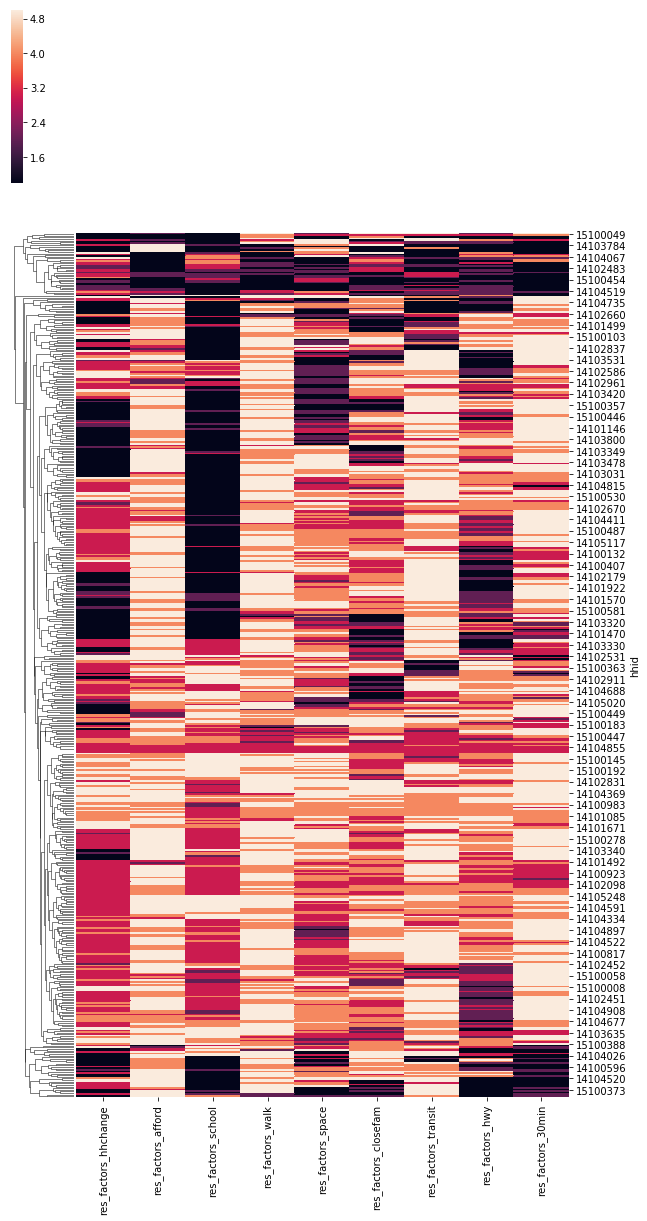

In [65]:
%matplotlib inline
import seaborn as sns

g = sns.clustermap(psrchh.loc[:,'res_factors_hhchange': 'res_factors_30min'],
                   metric='euclidean',
                   method='average',
                   col_cluster=False,
                  figsize=(10, 20))

In [66]:
#doesn't look like there's a great way to cluster, but we'll also check numericallY:
from sklearn.metrics import silhouette_score
from numpy import ravel

for nOfClusters in range(2,5):
    # get cluster labels
    clusterLabels = ravel(cut_tree(psSimi_link, nOfClusters)) # formatting cut_tree output with ravel
    # get silhouettes
    silhouette_avg = silhouette_score(psSimi_matrix,clusterLabels,metric='precomputed')
    
    # print results:
    print("For n_clusters =", nOfClusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.366083808292
For n_clusters = 3 The average silhouette_score is: 0.311747183061
For n_clusters = 4 The average silhouette_score is: 0.222006144326


In [67]:
#all of those silhouette scores are quite low, so we'll do something else

# Step 5: Let's try a different method of simplification: we'll create a dataframe that collapses the data into means by zipcode

In [68]:
#let's create a variable with all the different move factors:
resfacNames=psrchh.columns[psrchh.columns.str.contains('res_factors')].tolist()
resfacNames

['res_factors_hhchange',
 'res_factors_afford',
 'res_factors_school',
 'res_factors_walk',
 'res_factors_space',
 'res_factors_closefam',
 'res_factors_transit',
 'res_factors_hwy',
 'res_factors_30min']

In [69]:
psrchh[resfacNames].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 14100007 to 15100818
Data columns (total 9 columns):
res_factors_hhchange    530 non-null int64
res_factors_afford      530 non-null int64
res_factors_school      530 non-null int64
res_factors_walk        530 non-null int64
res_factors_space       530 non-null int64
res_factors_closefam    530 non-null int64
res_factors_transit     530 non-null int64
res_factors_hwy         530 non-null int64
res_factors_30min       530 non-null int64
dtypes: int64(9)
memory usage: 41.4 KB


In [70]:
psrchh[resfacNames].describe() #great

,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2.771698,4.262264,2.501887,4.284906,3.375472,3.356604,4.001887,3.079245,3.930189
std,1.300992,1.063704,1.446264,1.041646,1.252809,1.255312,1.247302,1.301934,1.314753
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000
50%,3.000000,5.000000,3.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000
75%,4.000000,5.000000,3.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [71]:
#We'll use groupby to create a new dataframe that groups our data by the zipcode of the resident:
#we'll also use this data for a map
psMove = psrchh.groupby(['h_zip'], as_index=False)[resfacNames].mean() #might be onto something here
psMove #looks great

,h_zip,res_factors_hhchange,res_factors_afford,res_factors_school,res_factors_walk,res_factors_space,res_factors_closefam,res_factors_transit,res_factors_hwy,res_factors_30min
0,98001,4.000000,5.000000,3.000000,4.000000,3.000000,5.000000,4.000000,5.000000,5.000000
1,98002,3.200000,4.000000,2.800000,3.200000,3.800000,2.800000,3.200000,2.600000,3.000000
2,98003,2.333333,4.333333,2.333333,3.000000,3.333333,3.000000,2.666667,3.333333,2.666667
3,98004,2.666667,3.500000,2.833333,4.666667,3.166667,3.666667,3.166667,4.000000,3.500000
4,98005,5.000000,4.000000,5.000000,5.000000,5.000000,3.000000,3.000000,3.000000,5.000000
5,98006,3.666667,4.333333,4.833333,3.500000,4.500000,3.500000,2.833333,4.333333,3.833333
6,98007,2.818182,4.090909,3.363636,3.818182,3.000000,3.727273,4.000000,2.545455,3.727273
7,98008,2.000000,3.000000,2.000000,3.000000,2.000000,3.500000,3.000000,3.000000,3.000000
8,98011,2.000000,3.500000,1.500000,1.500000,1.500000,2.500000,2.000000,2.000000,3.000000
9,98019,5.000000,4.000000,5.000000,5.000000,1.000000,4.000000,4.000000,1.000000,4.000000


In [72]:
#now we're going to create a column in that df that lists whichever factor was the most impactful in moving for each row:
psMove['factor1'] = psMove[['res_factors_hhchange',
 'res_factors_afford',
 'res_factors_school',
 'res_factors_walk',
 'res_factors_space',
 'res_factors_closefam',
 'res_factors_transit',
 'res_factors_hwy',
 'res_factors_30min']].idxmax(axis=1)

psMove.factor1 #let's verify that worked

0       res_factors_afford
1       res_factors_afford
2       res_factors_afford
3         res_factors_walk
4     res_factors_hhchange
5       res_factors_school
6       res_factors_afford
7     res_factors_closefam
8       res_factors_afford
9     res_factors_hhchange
10         res_factors_hwy
11        res_factors_walk
12       res_factors_space
13       res_factors_30min
14      res_factors_afford
15        res_factors_walk
16      res_factors_afford
17      res_factors_afford
18       res_factors_space
19      res_factors_afford
20      res_factors_afford
21      res_factors_afford
22       res_factors_30min
23        res_factors_walk
24       res_factors_30min
25      res_factors_afford
26      res_factors_afford
27        res_factors_walk
28      res_factors_afford
29      res_factors_afford
              ...         
39        res_factors_walk
40     res_factors_transit
41      res_factors_afford
42      res_factors_afford
43        res_factors_walk
44     res_factors_transit
4

In [73]:
psMove.factor1.dtype #checking the dtype

dtype('O')

In [74]:
#we want that to be a category, so:
from pandas.api.types import CategoricalDtype
psMove.factor1=psMove.factor1.astype(CategoricalDtype(categories=resfacNames, 
                                         ordered=True))

In [75]:
psMove.factor1.dtype

CategoricalDtype(categories=['res_factors_hhchange', 'res_factors_afford',
                  'res_factors_school', 'res_factors_walk',
                  'res_factors_space', 'res_factors_closefam',
                  'res_factors_transit', 'res_factors_hwy',
                  'res_factors_30min'],
                 ordered=True)

# Step 6: Let's create a map to see which factors in moving make the biggest difference for each zipcode

In [76]:
#step one: getting map info
compressedMap=os.path.join(folderData,'WaZipsMap.zip')

import geopandas as gpd

waZipMap = gpd.GeoDataFrame.from_file(compressedMap)

waZipMap.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,21914,8600000US21914,21914,1924479,477175,"POLYGON ((-75.99444799999999 39.567742, -75.99..."
1,01001,8600000US01001,01001,29731610,2118827,"POLYGON ((-72.667677 42.045022, -72.657715 42...."
2,34736,8600000US34736,34736,322808220,78588518,"(POLYGON ((-81.806163 28.568643, -81.801577999..."
3,46151,8600000US46151,46151,530632048,9804480,"(POLYGON ((-86.398562 39.320829, -86.398125999..."
4,48039,8600000US48039,48039,59592687,4845242,"POLYGON ((-82.61060000000001 42.724669, -82.51..."


In [77]:
#checking datatypes
waZipMap.ZCTA5CE10.dtype

dtype('O')

In [78]:
psMove.h_zip.dtype

dtype('int64')

In [79]:
#different 
waZipMap.ZCTA5CE10=waZipMap.ZCTA5CE10.astype(int) #setting to int

In [80]:
#let's restrict map to just those counties we specified earlier
#psZips.zip.astype(int) #making sure it's the same type of data
waZipMap=waZipMap[(waZipMap.ZCTA5CE10.isin(psZips.zip))]
waZipMap

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
42,98146,8600000US98146,98146,12047560,1758214,"POLYGON ((-122.39586529922 47.51376729164519, ..."
283,98008,8600000US98008,98008,14317883,7356863,"POLYGON ((-122.137558 47.579916, -122.133332 4..."
285,98065,8600000US98065,98065,191907736,2246151,"POLYGON ((-121.908721 47.529516, -121.908001 4..."
331,98121,8600000US98121,98121,1141209,546001,"POLYGON ((-122.362298457347 47.6190119407141, ..."
989,98288,8600000US98288,98288,547663674,10860407,"POLYGON ((-121.521818 47.700273, -121.519314 4..."
1006,98144,8600000US98144,98144,8812563,4545367,"POLYGON ((-122.32054 47.592244, -122.319253 47..."
1462,98155,8600000US98155,98155,19621150,1713431,"POLYGON ((-122.329497 47.757752, -122.330405 4..."
1559,98045,8600000US98045,98045,872825639,15656105,"POLYGON ((-121.850361 47.392871, -121.846882 4..."
1562,98174,8600000US98174,98174,9145,0,"POLYGON ((-122.33624 47.604693, -122.335131 47..."
1627,98101,8600000US98101,98101,1344748,271084,"POLYGON ((-122.344937 47.60912, -122.334346 47..."


In [81]:
psMoveMap=waZipMap.merge(psMove, left_on='ZCTA5CE10', right_on='h_zip') ## merging data into shapefile

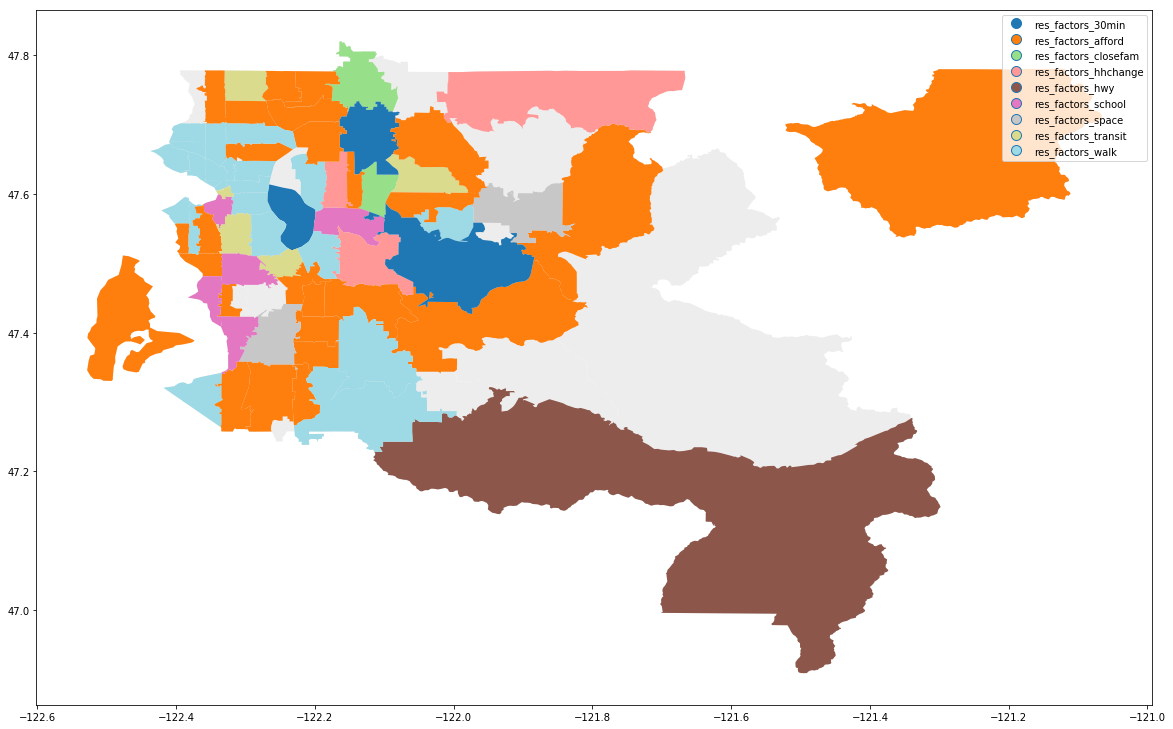

In [82]:
%matplotlib inline
base = waZipMap.plot(color='#ededed',figsize=(20,13))

#psrchhWAmap.plot(ax=base, color='pink')
psMoveMap.plot(ax=base,column='factor1',cmap='tab20',categorical=True,legend=True)


# Step 7: Since we can see that affordability is the biggest factor in most places, let's explore that a bit more

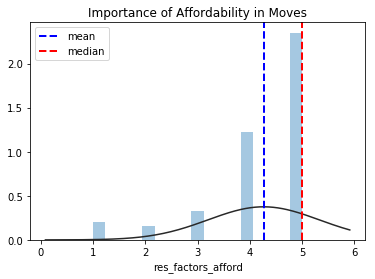

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt # needed for more customization
from scipy.stats import norm
#statistics:
mnVar=psrchh['res_factors_afford'].mean()
mdVar=psrchh['res_factors_afford'].median()

sns.distplot(psrchh['res_factors_afford'].dropna(),kde=False,fit=norm)
plt.title('Importance of Affordability in Moves')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend() #I should update this to include more info